In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
data = pd.read_csv('minute_weather.csv',index_col = 0)
data.head()

C:\Users\ghaidaa\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
rowID,,,,,,,,,,,,
0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [3]:
data = data.iloc[:10000]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hpwren_timestamp    10000 non-null  object 
 1   air_pressure        10000 non-null  float64
 2   air_temp            10000 non-null  float64
 3   avg_wind_direction  10000 non-null  float64
 4   avg_wind_speed      10000 non-null  float64
 5   max_wind_direction  10000 non-null  float64
 6   max_wind_speed      10000 non-null  float64
 7   min_wind_direction  10000 non-null  float64
 8   min_wind_speed      10000 non-null  float64
 9   rain_accumulation   9999 non-null   float64
 10  rain_duration       9999 non-null   float64
 11  relative_humidity   10000 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1015.6+ KB


In [5]:
targeted_features = list(data.columns) 
targeted_features.remove('hpwren_timestamp')
targeted_features.remove('air_pressure')
targeted_features.remove('rain_accumulation')
targeted_features.remove('rain_duration')
targeted_features

['air_temp',
 'avg_wind_direction',
 'avg_wind_speed',
 'max_wind_direction',
 'max_wind_speed',
 'min_wind_direction',
 'min_wind_speed',
 'relative_humidity']

In [6]:
data = data[targeted_features]

In [7]:
data.isnull().sum(axis=0)

air_temp              0
avg_wind_direction    0
avg_wind_speed        0
max_wind_direction    0
max_wind_speed        0
min_wind_direction    0
min_wind_speed        0
relative_humidity     0
dtype: int64

In [8]:
data.dropna(how='any', inplace=True)

In [9]:
data.isnull().sum(axis=0)

air_temp              0
avg_wind_direction    0
avg_wind_speed        0
max_wind_direction    0
max_wind_speed        0
min_wind_direction    0
min_wind_speed        0
relative_humidity     0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   air_temp            10000 non-null  float64
 1   avg_wind_direction  10000 non-null  float64
 2   avg_wind_speed      10000 non-null  float64
 3   max_wind_direction  10000 non-null  float64
 4   max_wind_speed      10000 non-null  float64
 5   min_wind_direction  10000 non-null  float64
 6   min_wind_speed      10000 non-null  float64
 7   relative_humidity   10000 non-null  float64
dtypes: float64(8)
memory usage: 703.1 KB


In [11]:
data.duplicated()[(data.duplicated() == True)]

Series([], dtype: bool)

In [12]:
data = data.drop_duplicates()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   air_temp            10000 non-null  float64
 1   avg_wind_direction  10000 non-null  float64
 2   avg_wind_speed      10000 non-null  float64
 3   max_wind_direction  10000 non-null  float64
 4   max_wind_speed      10000 non-null  float64
 5   min_wind_direction  10000 non-null  float64
 6   min_wind_speed      10000 non-null  float64
 7   relative_humidity   10000 non-null  float64
dtypes: float64(8)
memory usage: 703.1 KB


In [14]:
data.describe()

,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,relative_humidity
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,65.794568,155.009100,1.976450,162.903900,2.428200,153.613800,1.518240,57.575680
std,6.202689,82.465695,1.435692,80.726324,1.636634,86.897636,1.261251,19.239663
min,51.980000,0.000000,0.100000,0.000000,0.100000,0.000000,0.000000,15.500000
25%,62.240000,85.000000,0.900000,92.000000,1.200000,85.000000,0.600000,47.600000
50%,66.560000,177.000000,1.600000,188.000000,1.900000,171.000000,1.200000,58.300000
75%,70.520000,209.000000,2.700000,218.000000,3.300000,202.000000,2.100000,69.025000
max,78.620000,359.000000,8.900000,359.000000,9.300000,359.000000,8.200000,91.200000


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[list(data.columns)] = scaler.fit_transform(data[list(data.columns)])

In [16]:
data.describe()

,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,relative_humidity
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-4.863043e-15,-6.441514e-17,-4.050232e-16,2.419343e-16,-3.489764e-16,3.495745e-17,5.446574e-16,-1.726064e-15
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-2.227302e+00,-1.879774e+00,-1.307066e+00,-2.018078e+00,-1.422625e+00,-1.767844e+00,-1.203817e+00,-2.187033e+00
25%,-5.730975e-01,-8.489906e-01,-7.498155e-01,-8.783683e-01,-7.504802e-01,-7.896329e-01,-7.280754e-01,-5.185215e-01
50%,1.234094e-01,2.666806e-01,-2.622212e-01,3.108943e-01,-3.227517e-01,2.000868e-01,-2.523335e-01,3.764911e-02
75%,7.618742e-01,6.547401e-01,5.039983e-01,6.825389e-01,5.327053e-01,5.568462e-01,4.612793e-01,5.951192e-01
max,2.067825e+00,2.473769e+00,4.822690e+00,2.429268e+00,4.198950e+00,2.363660e+00,5.297989e+00,1.747744e+00


<AxesSubplot:>

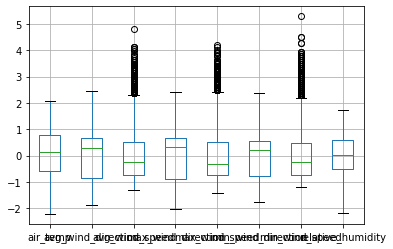

In [17]:
data.boxplot()

In [18]:
drop_ind = set()
drop_ind_list = []
for c in list(data.columns):
    #print(c,data.quantile(0.99)[c],'ffew')
    #print(len(data[data[c] >= data.quantile(0.99)[c]]))
    #print((data[data[c] >= data.quantile(0.99)[c]]).index)
    drop_ind.update(list((data[data[c] >= data.quantile(0.99)[c]]).index))
len(drop_ind)

707

In [19]:
data.drop(drop_ind,inplace=True)

# Hierarchical

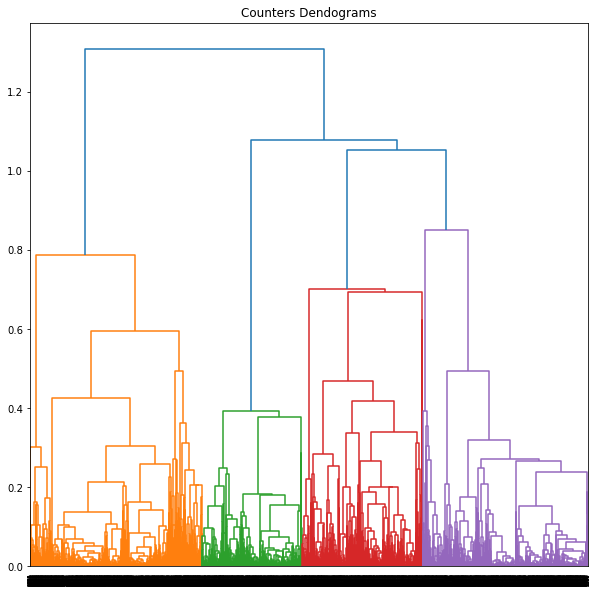

In [20]:
plt.figure(figsize=(10, 10))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y = data , method= 'average',metric= 'cosine'),orientation='top')

In [21]:
from sklearn.metrics import silhouette_score,silhouette_samples

linkages = ['ward', 'complete', 'average', 'single']
affinities = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
num_clusters = [2,3,4,5,6]
scores = []
best_score = 0
best_model = {}
for c in num_clusters:
    for l in linkages:
        if l == 'ward':
            model = AgglomerativeClustering(affinity='euclidean',n_clusters = c,linkage='ward')#,distance_threshold=100,n_clusters = 10)
            clustering = model.fit(data)
            labels = clustering.labels_
            score = silhouette_score(data, labels)
            scores.append(score)
            if score > best_score:
                best_score = score
                best_model['num_clusters'] = c
                best_model['linkage'] = l
                best_model['affinity'] = 'euclidean'
                best_model['score'] = score
            pass 
        else:
            for a in affinities:
                model = AgglomerativeClustering(affinity= a,n_clusters = c ,linkage= l)
                clustering = model.fit(data)
                labels = clustering.labels_
                score = silhouette_score(data, labels)
                scores.append(score)
                if score > best_score:
                    best_score = score
                    best_model['num_clusters'] = c
                    best_model['linkage'] = l
                    best_model['affinity'] = a
                    best_model['score'] = score

In [22]:
model = AgglomerativeClustering(affinity= best_model['affinity'],n_clusters =  best_model['num_clusters'],linkage= best_model['linkage'])
clustering = model.fit(data)
labels = clustering.labels_

In [23]:
best_model

{'num_clusters': 5,
 'linkage': 'ward',
 'affinity': 'euclidean',
 'score': 0.3560627402879086}

In [24]:
pd.DataFrame(labels).value_counts()

0    2744
1    2326
2    2276
3    1598
4     349
dtype: int64

In [25]:
best_model_hier = best_model

# DBSCAN

In [27]:
# dbscan and plot
eps = [0.5,1,2]
min_samples = [50,100,150]
scores = []
best_score = 0
best_model = {}
for e in eps:
    for m in min_samples:
        model = DBSCAN(eps = e, min_samples = m)
        clustering = model.fit(data)
        labels = clustering.labels_
        score = silhouette_score(data, labels)
        scores.append(score)
        if score > best_score:
            best_score = score
            best_model['eps'] = e
            best_model['min_samples'] = m
            best_model['score'] = score


In [28]:
model = DBSCAN(eps = best_model['eps'],min_samples = best_model['min_samples'])
clustering = model.fit(data)
labels = clustering.labels_

In [29]:
best_model

{'eps': 2, 'min_samples': 50, 'score': 0.2807294553272917}

In [30]:
pd.DataFrame(labels).value_counts()

 0    9285
-1       8
dtype: int64

In [31]:
best_model_dbscan = best_model

# K-means

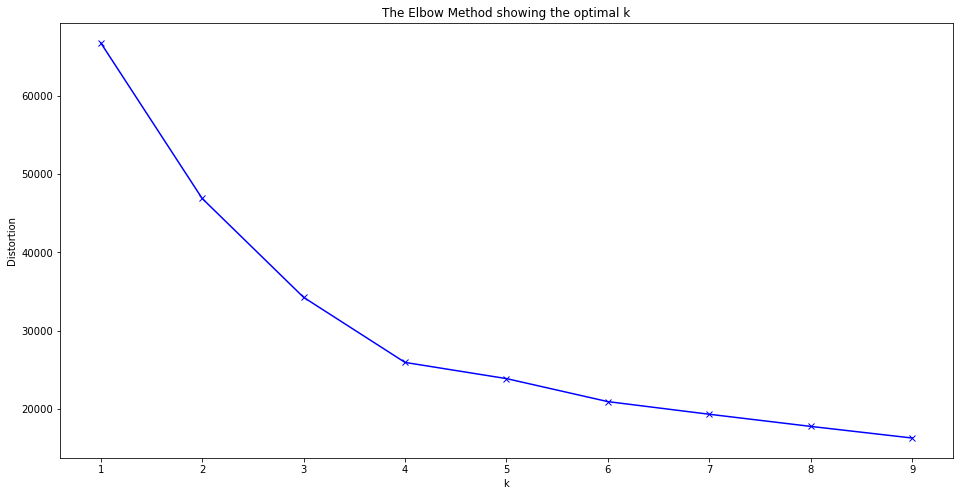

In [32]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [33]:
K = range(2,10)
scores = []
best_score = 0
best_model_kmeans = {}
for k in K:
    model = KMeans(n_clusters=k)
    clustering = model.fit(data)
    labels = clustering.labels_
    score = silhouette_score(data, labels)
    scores.append(score)
    if score > best_score:
        best_model_kmeans['best_score'] = score
        best_model_kmeans['k'] = k
        best_score = score

In [35]:
model = KMeans(n_clusters = best_model_kmeans['k'])
clustering = model.fit(data)
labels = clustering.labels_

In [36]:
best_model_kmeans

{'best_score': 0.38162828280944805, 'k': 5}

In [37]:
pd.DataFrame(labels).value_counts()

3    2710
0    2413
1    2083
2    1757
4     330
dtype: int64

# gaussian mixture model

In [38]:
best_model_gmm = {}
best_score = -1
for i in range(2,6):
    gmm = GaussianMixture(n_components=i,random_state=0).fit(data)
    labels = gmm.predict(data)
    score = silhouette_score(data, labels)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_model_gmm['num_clusters'] = i
        best_model_gmm['best_score'] = score
        
gmm = GaussianMixture(n_components=best_model_gmm['num_clusters'],random_state=0).fit(data)
labels = gmm.predict(data)

In [39]:
best_model_gmm

{'num_clusters': 4, 'best_score': 0.21649404105923795}

In [40]:
pd.DataFrame(labels).value_counts()

2    3819
0    2709
1    1598
3    1167
dtype: int64

# PCA

In [41]:
from sklearn.decomposition import PCA
pca = PCA()
train_pca = pca.fit_transform(data)
print(pca.explained_variance_ratio_)

[0.41100931 0.27834641 0.2047156  0.05763662 0.02018254 0.01853878
 0.00906784 0.0005029 ]


In [42]:
train_pca = train_pca[:,:2]
train_pca

array([[-1.34515674, -0.20594755],
       [-1.22296031,  0.13711855],
       [-0.97175206,  0.52053191],
       ...,
       [ 0.24038753,  2.27713804],
       [ 0.25579739,  2.21743027],
       [-0.13806243,  2.12929249]])

In [43]:
train_pca = pd.DataFrame(train_pca)
train_pca.describe()

,0,1
count,9.293000e+03,9.293000e+03
mean,-1.311080e-16,6.230534e-16
std,1.718623e+00,1.414320e+00
min,-3.268858e+00,-3.627399e+00
25%,-1.335690e+00,-9.671192e-01
50%,-3.246019e-01,-8.550856e-02
75%,1.097751e+00,8.958545e-01
max,4.669827e+00,4.652710e+00


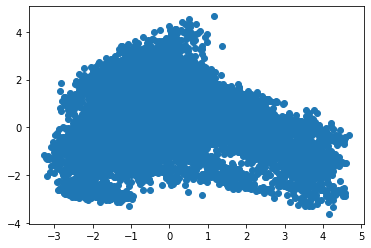

In [44]:
plt.scatter(train_pca.iloc[:,0],train_pca.iloc[:,1])

C:\Users\ghaidaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


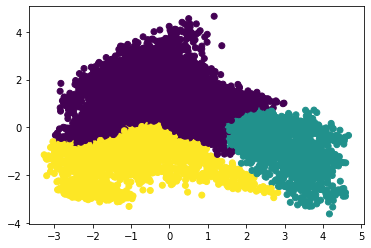

In [45]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(affinity='euclidean',distance_threshold=None,n_clusters = 3,linkage='ward')#,distance_threshold=100,n_clusters = 10)
clustering = model.fit(train_pca)
cluster_label = pd.DataFrame(clustering.labels_)
plt.scatter(train_pca.iloc[:,0],train_pca.iloc[:,1],c=cluster_label)
score_hier = silhouette_score(data, cluster_label)

C:\Users\ghaidaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


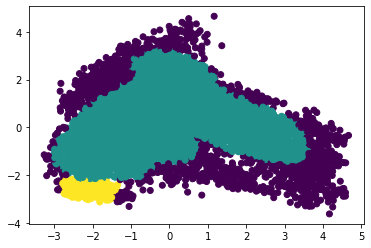

In [46]:
model = DBSCAN(eps = 0.5, min_samples = 250)
clustering = model.fit(train_pca)
cluster_label = clustering.labels_
cluster_label = pd.DataFrame(cluster_label)
plt.scatter(train_pca.iloc[:,0],train_pca.iloc[:,1],c=cluster_label)
score_dbscan = silhouette_score(data, cluster_label)

C:\Users\ghaidaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


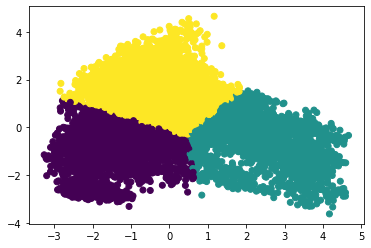

In [47]:
model = KMeans(n_clusters=3)
clustering = model.fit(train_pca)
cluster_label = clustering.labels_
cluster_label = pd.DataFrame(clustering.labels_)
plt.scatter(train_pca.iloc[:,0],train_pca.iloc[:,1],c=cluster_label)
score_kmeans = silhouette_score(data, cluster_label)

C:\Users\ghaidaa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


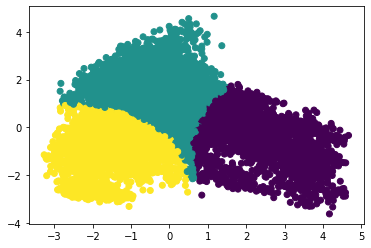

In [48]:
gmm = GaussianMixture(n_components=3,random_state=0).fit(train_pca)
cluster_label = gmm.predict(train_pca)
cluster_label = pd.DataFrame(cluster_label)
plt.scatter(train_pca.iloc[:,0],train_pca.iloc[:,1],c=cluster_label)
score_gauss = silhouette_score(data, cluster_label)

In [49]:
pd.DataFrame({'score_dbscan_pca':[score_dbscan],'score_hier_pca':[score_hier],'score_gauss_pca':[score_gauss],'score_kmeans_pca':[score_kmeans]})

,score_dbscan_pca,score_hier_pca,score_gauss_pca,score_kmeans_pca
0,0.058201,0.256731,0.29975,0.306848


In [50]:
pd.DataFrame({'score_dbscan':[best_model_dbscan['score']],'score_hier':[best_model_hier['score']],'score_gauss':[best_model_gmm['best_score']],'score_kmeans':[best_model_kmeans['best_score']]})

,score_dbscan,score_hier,score_gauss,score_kmeans
0,0.280729,0.356063,0.216494,0.381628
